# Graduate Admission 

We are going to study the factors which determine the admission of a student to an American university.

Among the factors, we'll consider: 

1. GRE Scores ( out of 340 ) 
2. TOEFL Scores ( out of 120 ) 
3. University Rating ( out of 5 ) 
4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 
5. Undergraduate GPA ( out of 10 ) 
6. Research Experience ( either 0 or 1 ) 
7. Chance of Admit ( ranging from 0 to 1 )

0. Import the usual libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

sns.set(rc={'figure.figsize':(8,5)})

1. Import the dataset as a dataframe 

In [2]:
admissions = pd.read_csv('./Dataset/Admission_Predict_Ver1.1.csv', sep=",")

In [3]:
admissions.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
admissions.columns.values

array(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating',
       'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype=object)

Check if there are any outliers.

Text(0.5, 1.0, 'Undergrad GPA')

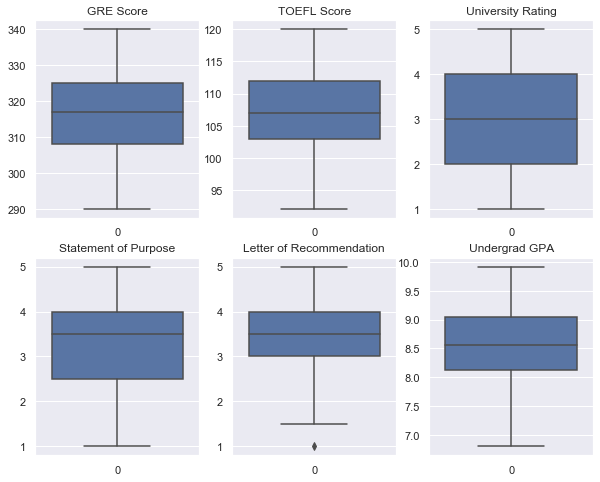

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(10, 8))
sns.boxplot(ax=axes[0, 0], data=admissions['GRE Score']).set_title('GRE Score')
sns.boxplot(ax=axes[0, 1], data=admissions['TOEFL Score']).set_title('TOEFL Score')
sns.boxplot(ax=axes[0, 2], data=admissions['University Rating']).set_title('University Rating')
sns.boxplot(ax=axes[1, 0], data=admissions['SOP']).set_title('Statement of Purpose')
sns.boxplot(ax=axes[1, 1], data=admissions['LOR ']).set_title( 'Letter of Recommendation')
sns.boxplot(ax=axes[1, 2], data=admissions['CGPA']).set_title('Undergrad GPA')

Let us check if there are relations between the variables. It looks like the CGPA, TOEFL, and GRE scores have a similar behaviour (the higher the CGPA, the higher the TOEFL and GRE score).

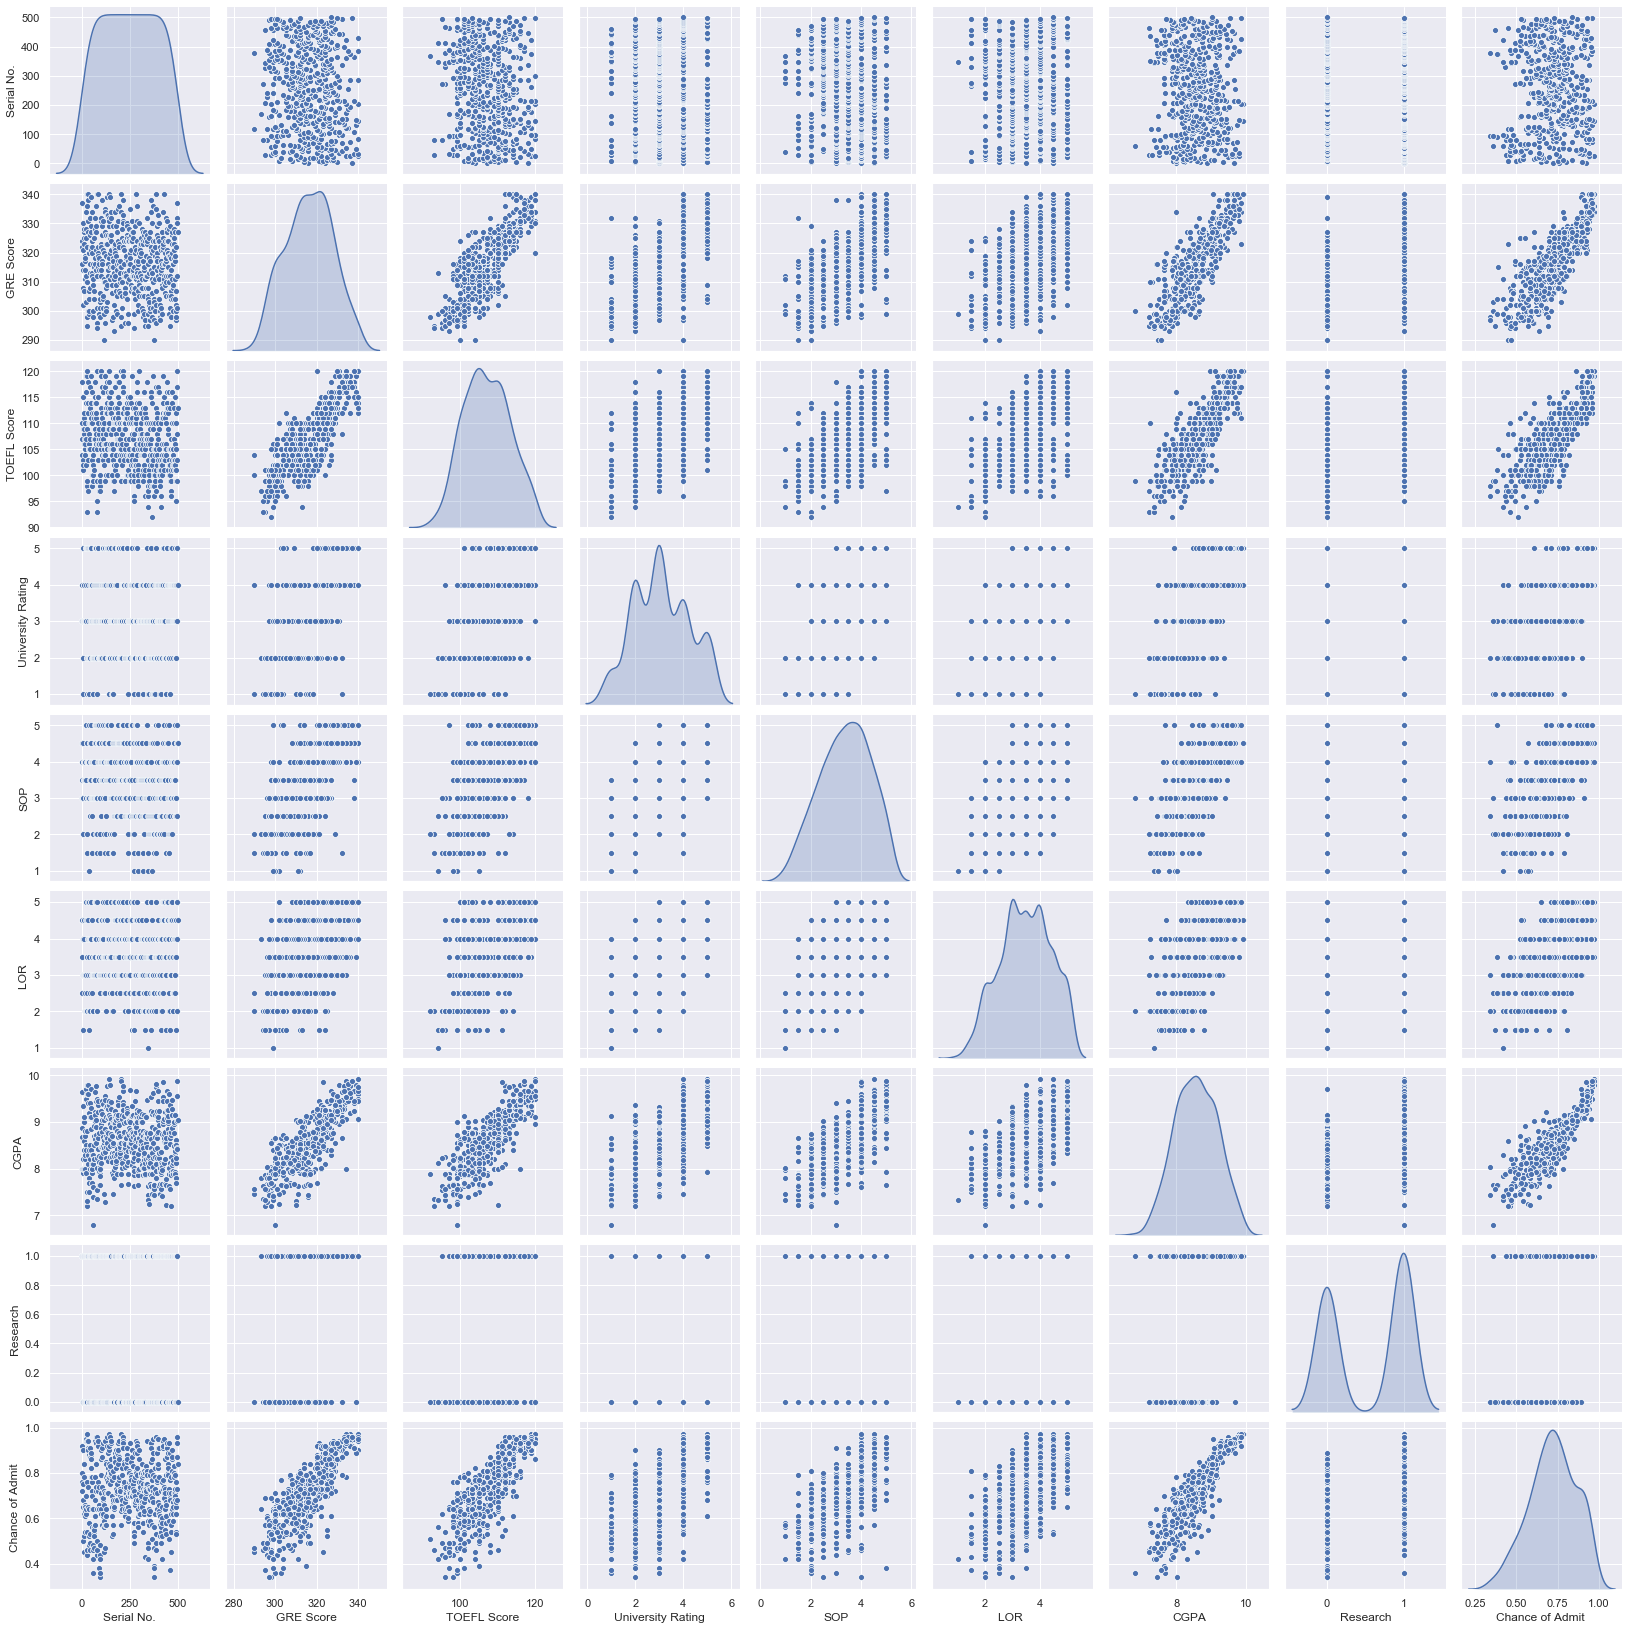

In [7]:
# Correlation matrix using scatterplot
sns.pairplot(admissions, diag_kind = "kde")

The plots seems to clearly show that ‘Chance of Admit’ increases with the standardized test scores. Moreover, it seems like that those who have a high GRE/TOEFL scores and a higher chance of admission, have also done academic research.

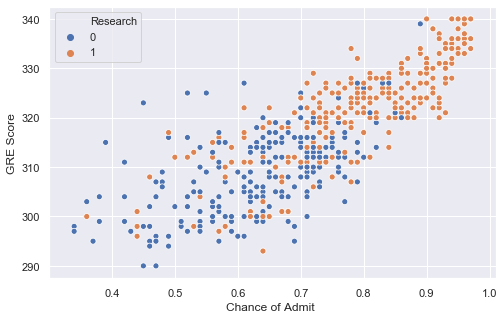

In [8]:
sns.scatterplot(data=admissions, x="Chance of Admit ", y="GRE Score", hue = "Research")

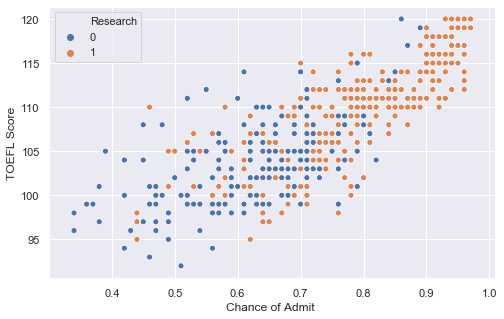

In [9]:
sns.scatterplot(data=admissions, x="Chance of Admit ", y="TOEFL Score", hue = "Research")

2. Our target variable *Chance of Admit* is a probability. We would like to have a class (0 or 1). Replace the probabilities that are greater than 75% with 1, otherwise with 0

In [10]:
mask = admissions["Chance of Admit "] > 0.75

In [11]:
admissions["Chance of Admit "][mask] = 1

In [12]:
admissions["Chance of Admit "][- mask]= 0

In [13]:
admissions["Chance of Admit "].dtypes

dtype('float64')

In [14]:
admissions["Chance of Admit "] = admissions["Chance of Admit "].astype(int)

In [15]:
admissions.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0


In [16]:
admissions.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

3. See the repartition of the GRE Score with respect to the admission

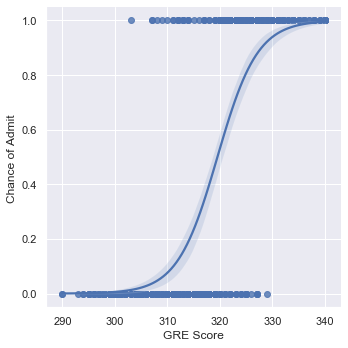

In [17]:
sns.lmplot(x = "GRE Score", y = "Chance of Admit ", data = admissions, logistic=True)

4. Do the same with the Toefl Score  / CGPA

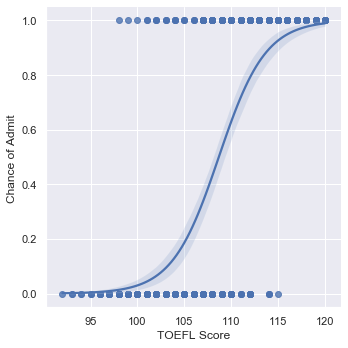

In [18]:
sns.lmplot(x = "TOEFL Score", y = "Chance of Admit ", data = admissions, logistic=True)

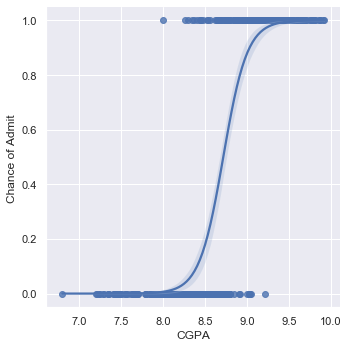

In [19]:
sns.lmplot(x = "CGPA", y = "Chance of Admit ", data = admissions, logistic=True)

5. Plot a barplot on the columns LOR / SOP / University Rating / Research

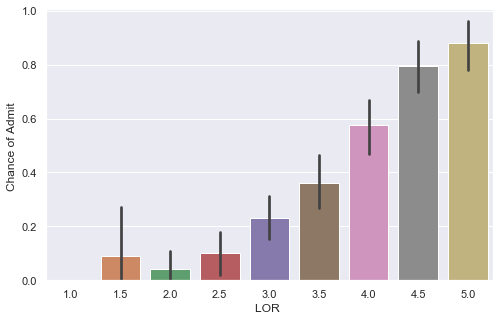

In [20]:
sns.barplot(x = "LOR ", y = "Chance of Admit ", data = admissions)

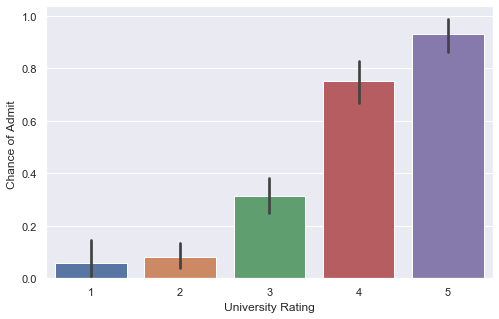

In [21]:
sns.barplot(x = "University Rating", y = "Chance of Admit ", data = admissions)

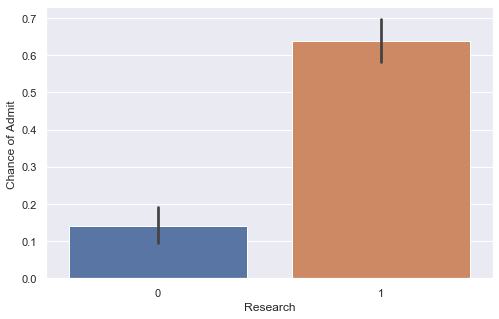

In [22]:
sns.barplot(x = "Research", y = "Chance of Admit ", data = admissions)

6. Separate the dataset in explicative variable ```X``` & target variable ```y``` 

In [23]:
X = admissions.drop(columns = "Chance of Admit ")

In [24]:
X.columns.values

array(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating',
       'SOP', 'LOR ', 'CGPA', 'Research'], dtype=object)

In [25]:
y = admissions["Chance of Admit "]

7. Separate the dataset in training data and test data

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify = y, random_state = 42)

8. We try a first decision tree and see the score in a confusion matrix

In [27]:
from sklearn import tree

clf_gini = tree.DecisionTreeClassifier()
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [28]:
from sklearn.metrics import classification_report

print("GINI")
print(classification_report(y_true = y_test, y_pred = clf_gini.predict(X_test)))

GINI
              precision    recall  f1-score   support

           0       0.90      0.87      0.89        87
           1       0.83      0.87      0.85        63

    accuracy                           0.87       150
   macro avg       0.87      0.87      0.87       150
weighted avg       0.87      0.87      0.87       150



In [29]:
clf_gini.score(X_test, y_test)*100

87.33333333333333

9. Visualisez votre arbre via graphviz 

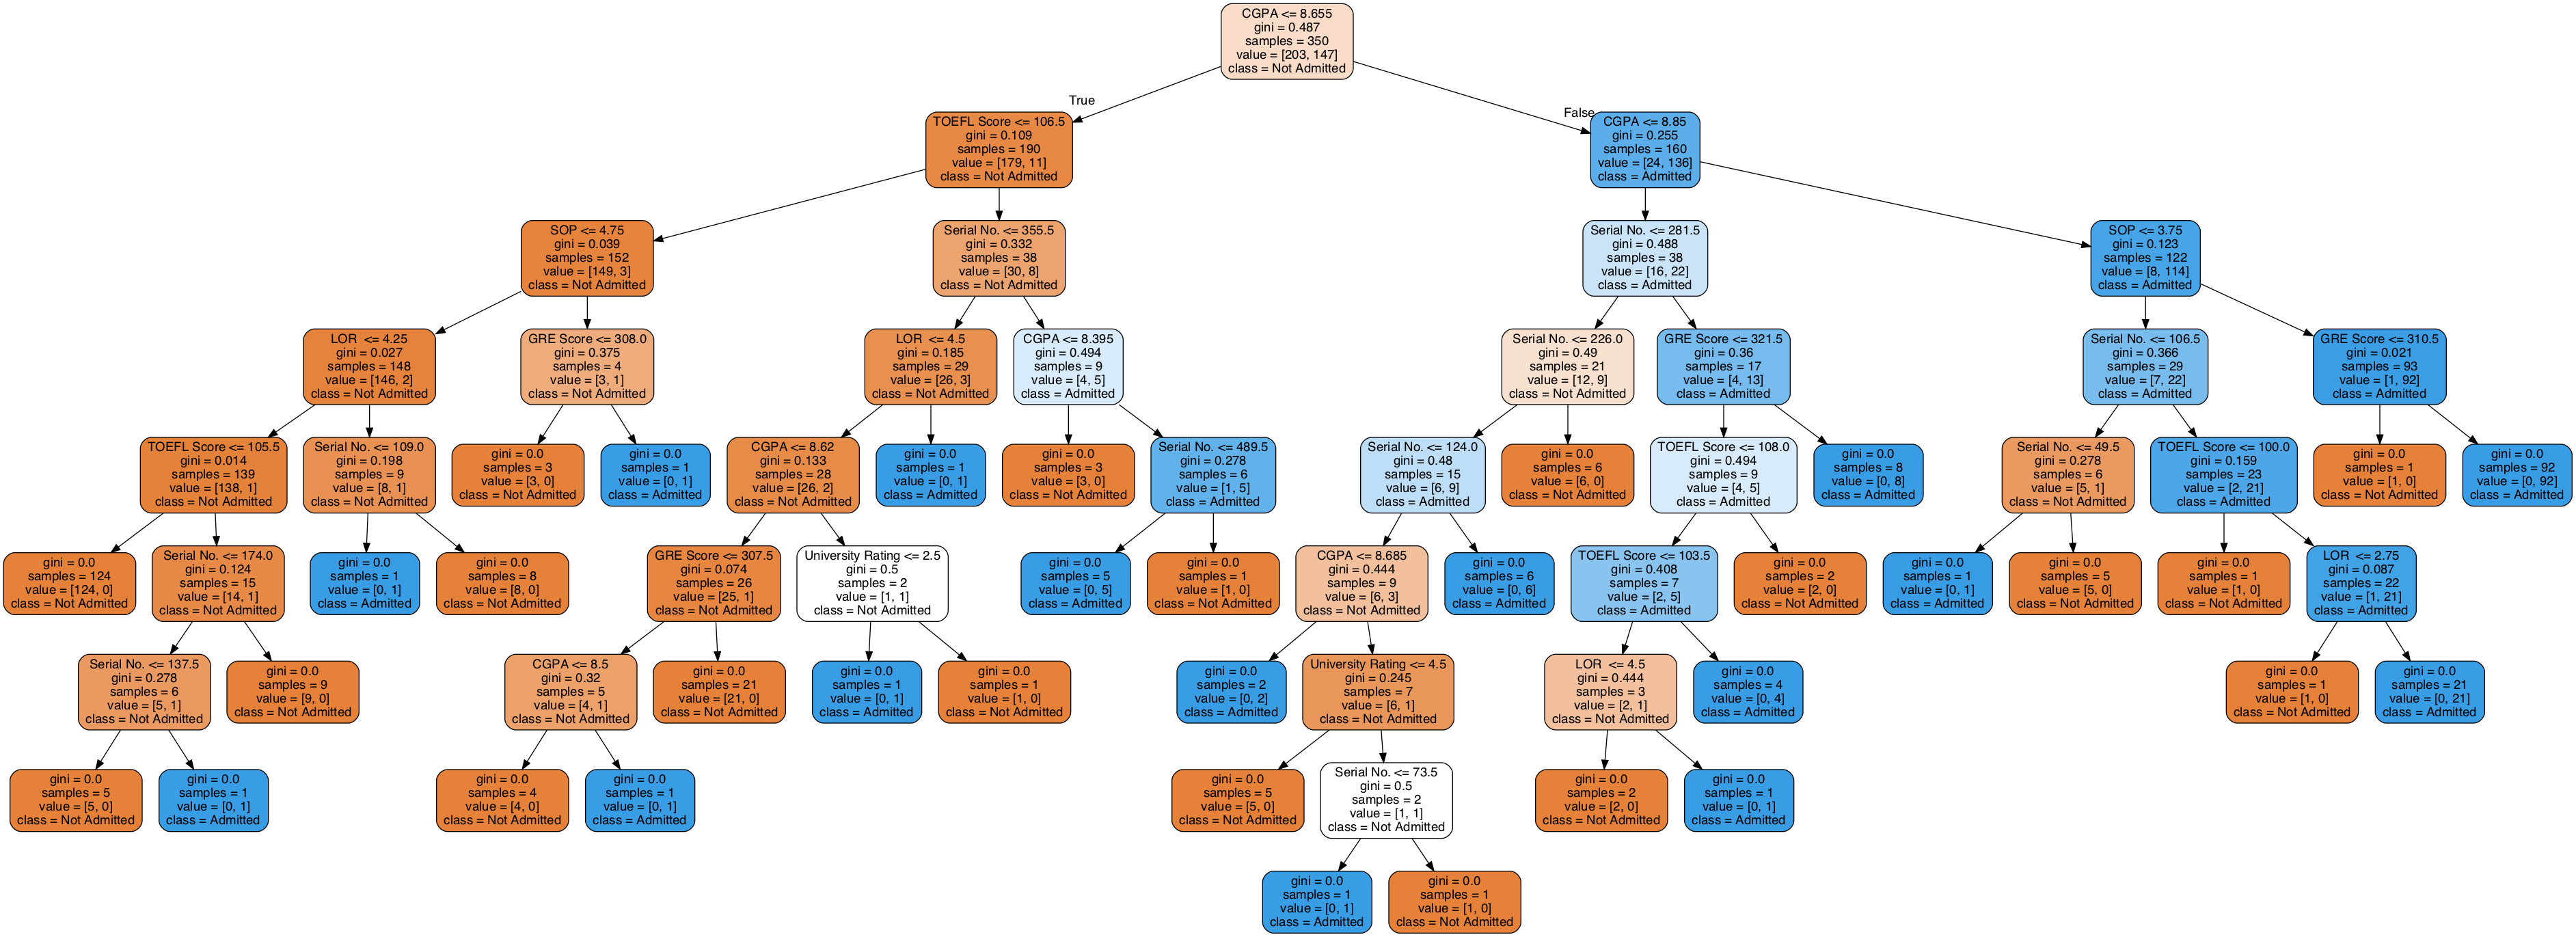

In [30]:
import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(clf_gini,
                    # out_file='tree.dot',
                     rounded=True,
                     filled = True,
                     class_names = ["Not Admitted","Admitted"],
                     feature_names = X.columns.values)

graph = pydotplus.graph_from_dot_data(dot_data)
#graph = pydotplus.graph_from_dot_file('tree.dot')   # if I use the commented out_file='tree.dot'

Image(graph.create_png())

10. Check the most important features that determine admissions 

In [31]:
clf_gini.feature_importances_

array([0.14365541, 0.03210635, 0.04214343, 0.01005328, 0.0163457 ,
       0.0298499 , 0.72584594, 0.        ])

In [32]:
clf_gini

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [33]:
df_feature_importance = pd.DataFrame(clf_gini.feature_importances_,
                                     index=X.columns.values,
                                     columns=['feature importance']).sort_values('feature importance', ascending=False)
df_feature_importance

,feature importance
CGPA,0.725846
Serial No.,0.143655
TOEFL Score,0.042143
GRE Score,0.032106
LOR,0.029850
SOP,0.016346
University Rating,0.010053
Research,0.000000


In [34]:
#df_feature_importance.plot(kind='barh')

In [35]:
df_feature_importance.columns.values[0]

'feature importance'

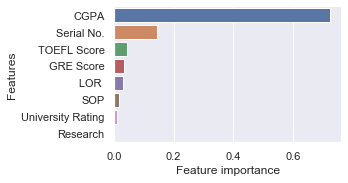

In [36]:
ax =sns.catplot(
    x = df_feature_importance.columns.values[0],
    y = [index for index in df_feature_importance.index],
    data = df_feature_importance,
    kind ="bar")
ax.set(xlabel="Feature importance", ylabel="Features")
plt.show()

It looks like the most importance feature is the CGPA.

11. Let's improve our score. Use a Random Forest with 50 decision trees

The random forest combines hundreds or thousands of decision trees, trains each one on a slightly different set of the observations, splitting nodes in each tree considering a limited number of the features. The final predictions of the random forest are made by averaging the predictions of each individual tree.

RFs train each tree independently, using a random sample of the data. This randomness helps to make the model more robust than a single decision tree, and less likely to overfit on the training data.

```n_estimators``` is the number of trees to be used in the forest. Since Random Forest is an ensemble method comprising of creating multiple decision trees, this parameter is used to control the number of trees to be used in the process.

In [37]:
from sklearn.ensemble import RandomForestClassifier

rfc_50 = RandomForestClassifier(n_estimators=50)
rfc_50.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
from sklearn.metrics import classification_report

print("RANDOM FOREST")
print(classification_report(y_true = y_test, y_pred = rfc_50.predict(X_test)))

RANDOM FOREST
              precision    recall  f1-score   support

           0       0.92      0.93      0.93        87
           1       0.90      0.89      0.90        63

    accuracy                           0.91       150
   macro avg       0.91      0.91      0.91       150
weighted avg       0.91      0.91      0.91       150



In [39]:
rfc_50.score(X_test, y_test)*100

91.33333333333333

12. Retry the model with 20 trees

In [40]:
from sklearn.ensemble import RandomForestClassifier

rfc_20 = RandomForestClassifier(n_estimators=50)
rfc_20.fit(X_train, y_train)

from sklearn.metrics import classification_report

print("RANDOM FOREST")
print(classification_report(y_true = y_test, y_pred = rfc_20.predict(X_test)))

RANDOM FOREST
              precision    recall  f1-score   support

           0       0.90      0.91      0.90        87
           1       0.87      0.86      0.86        63

    accuracy                           0.89       150
   macro avg       0.88      0.88      0.88       150
weighted avg       0.89      0.89      0.89       150



In [41]:
rfc_20.score(X_test, y_test)*100

88.66666666666667

It seems like there is an optimal number of trees we can use.

13. Use the Grid Search to find the optimal number of trees

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator = RandomForestClassifier(random_state=42),
                      param_grid = param_grid,
                      cv = 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [43]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'n_estimators': 500}

In [44]:
best_estimator = CV_rfc.best_estimator_

In [45]:
best_estimator.score(X_test, y_test)*100

90.0

14. Check the feature importance

In [46]:
best_estimator.feature_importances_

array([0.05538872, 0.22115862, 0.15263122, 0.06238446, 0.06663157,
       0.0349662 , 0.39318826, 0.01365095])

In [47]:
df_feature_importance_CV_rfc = pd.DataFrame(best_estimator.feature_importances_,
                                     index=X.columns.values,
                                     columns=['feature importance']).sort_values('feature importance', ascending=False)
df_feature_importance_CV_rfc

,feature importance
CGPA,0.393188
GRE Score,0.221159
TOEFL Score,0.152631
SOP,0.066632
University Rating,0.062384
Serial No.,0.055389
LOR,0.034966
Research,0.013651


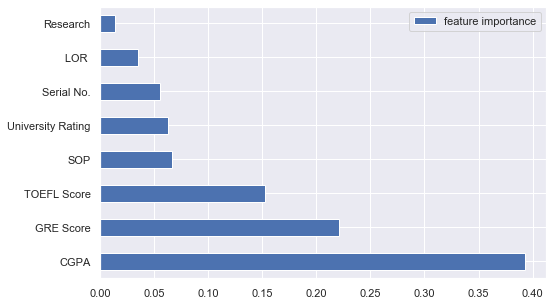

In [48]:
df_feature_importance_CV_rfc.plot(kind='barh');

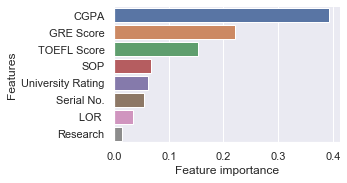

In [49]:
ax =sns.catplot(
    x = df_feature_importance_CV_rfc.columns.values[0],
    y = [index for index in df_feature_importance_CV_rfc.index],
    data = df_feature_importance_CV_rfc,
    kind ="bar")
ax.set(xlabel="Feature importance", ylabel="Features")
plt.show()

We see that the CGPA is the most important feature, while the GRE Score is second.